<a href="https://colab.research.google.com/github/a3m2021/github-slideshow/blob/master/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# google colab data management
import os.path

try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    _home = 'gdrive/MyDrive/'
except ImportError:
    _home = '~'
finally:
    data_root = os.path.join(_home, '.pytorch')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images/255
test_images = test_images/255

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(10,activation='softmax')
])

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4749 - accuracy: 0.8270
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3615 - accuracy: 0.8677
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3273 - accuracy: 0.8789
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3069 - accuracy: 0.8874
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2909 - accuracy: 0.8920
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2771 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2646 - accuracy: 0.9003
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2545 - accuracy: 0.9047
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2446 - accuracy: 0.9079
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

0.88919997215271

In [21]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[1])])
prediction.shape

Pullover


(10000, 10)

In [29]:
counter_true = 0
for x in range(len(prediction)):
  # print('predicted: ',class_names[np.argmax(prediction[x])], 'Actual:',class_names[np.argmax(test_labels[x])])
  if np.argmax(prediction[x]) == np.argmax(test_labels[x]):
    counter_true += 1
len(prediction)/counter_true

9.727626459143968

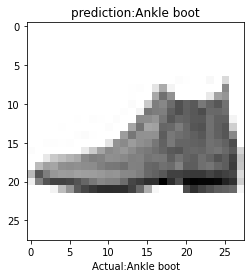

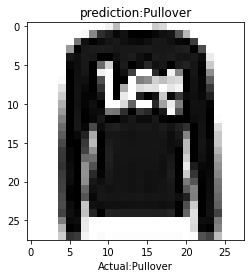

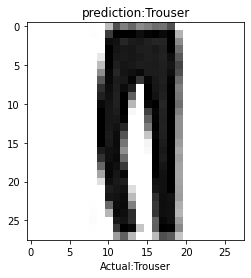

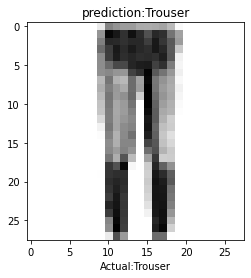

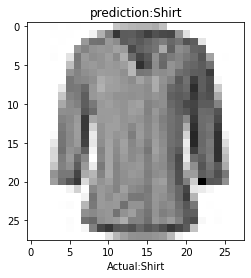

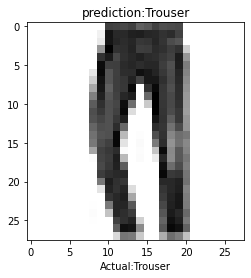

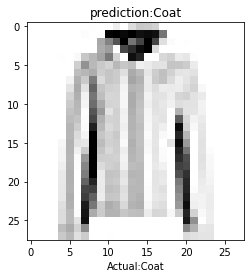

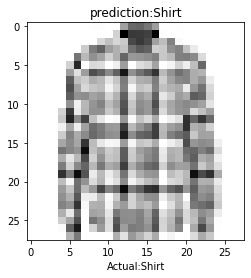

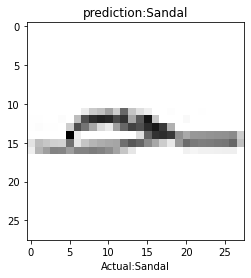

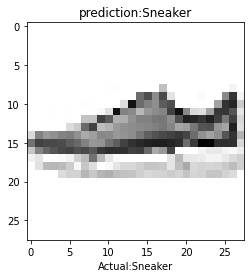

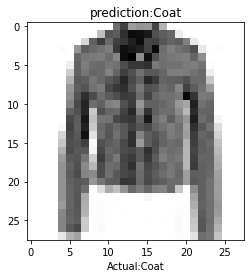

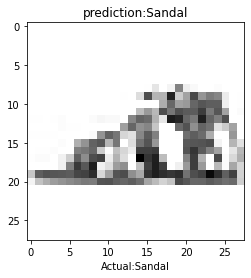

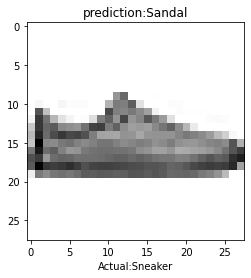

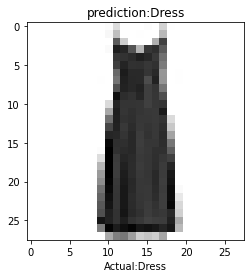

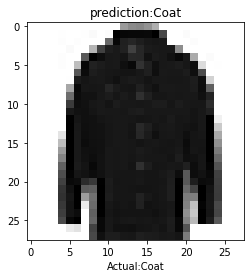

In [35]:
for i in range(15):
  plt.grid(False)
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  plt.xlabel("Actual:" + class_names[test_labels[i]])
  plt.title("prediction:" + class_names[np.argmax(prediction[i])])
  plt.show()